Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Airbnb.xlsx to Airbnb.xlsx


In [4]:
df = pd.read_excel('Airbnb.xlsx', sheet_name ='airbnb_data')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

id     log_price  accommodates     bathrooms  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263   
std    6.081735e+06      0.717394      2.153589      0.582044   
min    3.440000e+02      0.000000      1.000000      0.000000   
25%    6.261964e+06      4.317488      2.000000      1.000000   
50%    1.225415e+07      4.709530      2.000000      1.000000   
75%    1.640226e+07      5.220356      4.000000      1.000000   
max    2.123090e+07      7.600402     16.000000      8.000000   

       host_response_rate      latitude     longitude  number_of_reviews  \
count        55812.000000  74111.000000  74111.000000       74111.000000   
mean             0.943520     38.445958    -92.397525          20.900568   
std              0.163418      3.080167     21.705322          37.828641   
min              0.000000     33.338905   -122.511500           0.000000   
25%              1.000000     34.127908   -118.342374           1.000000   
50%              1.000000     40.662138    -76.996965           6.000000   
75%              1.000000     40.746096    -73.954660          23.000000   
max              1.000000     42.390437    -70.985047         605.000000   

       review_scores_rating      bedrooms          beds  
count          57389.000000  74020.000000  73980.000000  
mean              94.067365      1.265793      1.710868  
std                7.836556      0.852143      1.254142  
min               20.000000      0.000000      0.000000  
25%               92.000000      1.000000      1.000000  
50%               96.000000      1.000000      1.000000  
75%              100.000000      1.000000      2.000000  
max              100.000000     10.000000     18.000000

In [5]:
df.isnull().sum().sort_values(ascending=False)

host_response_rate        18299
review_scores_rating      16722
first_review              15864
last_review               15827
thumbnail_url              8216
neighbourhood              6872
zipcode                     968
bathrooms                   200
host_identity_verified      188
host_has_profile_pic        188
host_since                  188
beds                        131
bedrooms                     91
name                         10
description                   6
cleaning_fee                  0
city                          0
accommodates                  0
property_type                 0
room_type                     0
amenities                     0
id                            0
log_price                     0
bed_type                      0
cancellation_policy           0
longitude                     0
latitude                      0
instant_bookable              0
number_of_reviews             0
dtype: int64

In [6]:
for col in ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']:
    df[col] = df[col].fillna(df[col].median())

In [7]:
df['property_type'] = df['property_type'].fillna('Unknown')
df['room_type'] = df['room_type'].fillna('Unknown')
df['bed_type'] = df['bed_type'].fillna('Unknown')
df['cancellation_policy'] = df['cancellation_policy'].fillna('Unknown')
df['city'] = df['city'].fillna('Unknown')

In [8]:
bool_cols =['host_has_profile_pic','host_identity_verified',
            'instant_bookable', 'cleaning_fee']
for col in bool_cols:
    df[col] = df[col].map({'t':1,'f':0, True: 1, False: 0})
    df[col].fillna(0)

In [9]:
import ast
def count_amenities(text):
    try:
        return len(ast.literal_eval(text))
    except:
        return 0
df['amenities_count'] = df['amenities'].apply(count_amenities)

In [10]:
from datetime import datetime
def host_years(date_str):
    try:
        date = pd.to_datetime(date_str, dayfirst=True)
        return (datetime.now()-date).days//365
    except:
        return 0

df['host_years'] = df['host_since'].apply(host_years)

In [11]:
df['desc_length'] = df['description'].fillna('').apply(lambda x: len(str(x).split()))

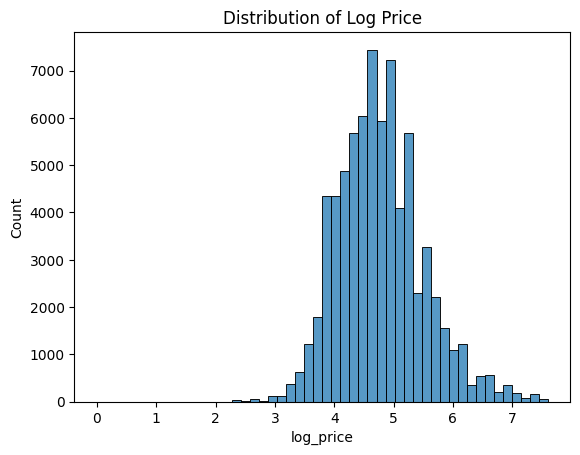

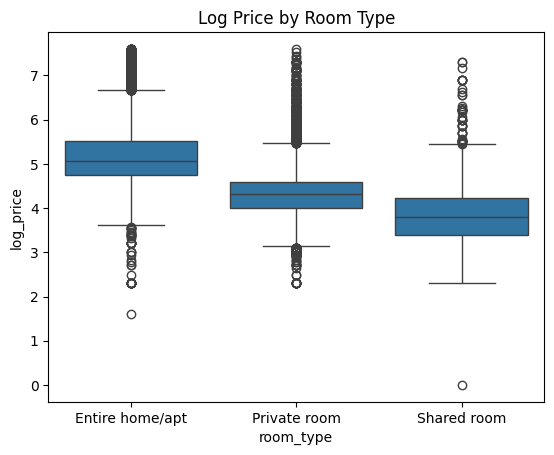

In [12]:
sns.histplot(df['log_price'], bins=50)
plt.title('Distribution of Log Price')
plt.show()

sns.boxplot(x='room_type',y='log_price',data=df)
plt.title('Log Price by Room Type')
plt.show()

In [13]:
feature_cols = [
    'accommodates','bathrooms','bedrooms','beds','number_of_reviews','review_scores_rating',
    'amenities_count','host_years','desc_length','host_has_profile_pic','host_identity_verified',
    'instant_bookable','cleaning_fee','property_type','room_type','bed_type','cancellation_policy','city']
x = df[feature_cols]
y = df['log_price']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
numeric_features = ['accommodates','bathrooms','bedrooms','beds','number_of_reviews','review_scores_rating',
    'amenities_count','host_years','desc_length','host_has_profile_pic','host_identity_verified',
    'instant_bookable','cleaning_fee']
categorical_features = ['property_type','room_type','bed_type','cancellation_policy','city']

In [16]:
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('onehot',StandardScaler())])

In [17]:
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [20]:
rf_model = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=100, random_state=42))])
rf_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('onehot',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'amenities_count',
                                                   'host_years', 'desc_length',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'instant_bookable',
                                                   'cleaning_fee']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy',
                                                   'city'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [24]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R^2: {r2:.3f}')


RMSE: 0.457
MAE: 0.341
R^2: 0.594


In [25]:
rf = rf_model.named_steps['regressor']
cat_ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features)
importances = rf.feature_importances_

feature_importances = pd.Series(importances, index=all_features)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()